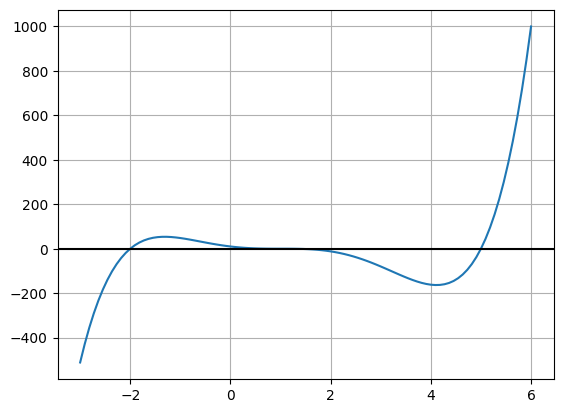

Las raíces del polinomio en orden ascendente son: [-2.0, 1.0, 1.00001, 5.0]


In [6]:
# Ejercicio 2: Raices de un polinomio

#Determine todas las raices del polinomio x^5 - 6x^4+ 2x^3 + 20x^2 - 27x + 10 = 0
#Escribir las raices en odern ascendente, sin repetir y en caso de no existir alguna raiz, escribir "No existe" utilizando el metodo de Newton-Raphson

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Definir la función y su derivada
def f(x):
    return x**5 - 6*x**4 + 2*x**3 + 20*x**2 - 27*x + 10

def df(x):
    return 5*x**4 - 24*x**3 + 6*x**2 + 40*x - 27

# Graficar la función
x = np.linspace(-3, 6, 100)
plt.plot(x, f(x))
plt.axhline(0, color='k')
plt.grid()
plt.show()

# Encontrar todas las raíces del polinomio utilizando el método de Newton-Raphson
initial_guesses = [0, 1, 2, 3, 4, 5]
roots = []

for guess in initial_guesses:
    try:
        root = optimize.newton(f, guess, fprime=df)
        root = round(root, 5)
        if root not in roots:
            roots.append(root)
    except RuntimeError:
        roots.append("No existe")

# Ordenar las raíces en orden ascendente y sin repetir
roots = sorted(set(roots))
print("Las raíces del polinomio en orden ascendente son:", roots)

# Ejercicio 3

In [12]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for y, x in zip(ys, xs))
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_1, c_0, c_ind)

In [13]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

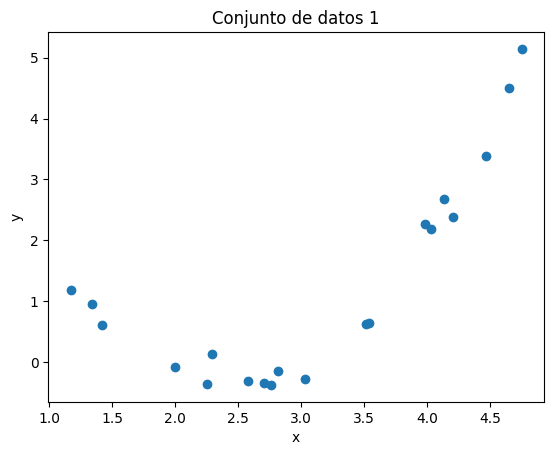

In [14]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

# Ejercicio 04

In [19]:
import logging
from sys import stdout
from datetime import datetime
import numpy as np

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

[08-14 08:57:16][INFO] 2024-08-14 08:57:16.722928


In [20]:
def gauss_jordan(Ab: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de Gauss-Jordan.

    ## Parameters

    ``Ab``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(Ab, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        Ab = np.array(Ab)
    assert Ab.shape[0] == Ab.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = Ab.shape[0]

    for i in range(0, n):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if Ab[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(Ab[pi, i]) < abs(Ab[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = Ab[i, :].copy()
            Ab[i, :] = Ab[p, :].copy()
            Ab[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(n):
            if i == j:
                continue
            m = Ab[j, i] / Ab[i, i]
            Ab[j, i:] = Ab[j, i:] - m * Ab[i, i:]

        logging.info(f"\n{Ab}")

    if Ab[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)

    for i in range(n - 1, -1, -1):
        solucion[i] = Ab[i, -1] / Ab[i, i]

    return solucion

In [21]:
from src import matriz_aumentada

A = [
    [1, 2, 3, 4],
    [2, 5, 6, 7],
    [3, 6, 8, 9],
    [4, 7, 9, 10],
]
b = [1, -2, 3, 4]

Ab = matriz_aumentada(A, b)
gauss_jordan(Ab)

ImportError: cannot import name 'matriz_aumentada' from 'src' (unknown location)